In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
orders = pd.read_csv('Orders - MetaData.csv').to_numpy()

Reference Lists, Dictionaries

In [3]:
week_share = pd.read_csv("Weekly Demand Share.csv")['Share'].to_numpy()
week = pd.read_csv("Weekly Demand Share.csv")['Week'].to_numpy()

product_share = pd.read_csv('Product Demand Share.csv')['Share'].to_numpy()
product = pd.read_csv('Product Demand Share.csv')['Product'].to_numpy()

zipcode_share = pd.read_csv("Zip Code Demand Share.csv")['Share'].to_numpy()
zipcode = pd.read_csv("Zip Code Demand Share.csv")['Zip Code'].to_numpy()

In [165]:
zip_latlong_df = pd.read_csv("Zip Code - Address Data.csv")
zip_lat_dict = zip_latlong_df.set_index('ZIP3')['Lat'].to_dict()
zip_long_dict = zip_latlong_df.set_index('ZIP3')['Lon'].to_dict()

Annual Growth:

In [4]:
growth = [1, 1.5, 2, 7/3, 8/3, 3]
demand_growth = np.empty((6))
demand_growth[0] = np.sum(orders[:,5])

for i in range(1,6):
    demand_growth[i] = np.rint(demand_growth[0]*growth[i])

years = ["2023","2024","2025","2026","2027","2028"]

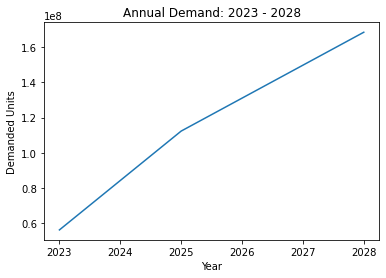

In [114]:
plt.plot(years, demand_growth)
plt.xlabel("Year")
plt.ylabel("Demanded Units")
plt.title("Annual Demand: 2023 - 2028")
plt.show()

In [115]:
print("Annual Demand: "+str(demand_growth))

Annual Demand: [5.61819220e+07 8.42728830e+07 1.12363844e+08 1.31091151e+08
 1.49818459e+08 1.68545766e+08]


Demand Share:

In [6]:
forecasted_total_share = np.empty((len(week), len(product), len(zipcode)))
for j in range(len(week)):
    for k in range(len(product)):
        for l in range(len(zipcode)):    
            forecasted_total_share[j,k,l] = week_share[j]*product_share[k]*zipcode_share[l]

In [7]:
demand_2023 = np.rint(demand_growth[0]*forecasted_total_share)
demand_2024 = np.rint(demand_growth[1]*forecasted_total_share)
demand_2025 = np.rint(demand_growth[2]*forecasted_total_share)
demand_2026 = np.rint(demand_growth[3]*forecasted_total_share)
demand_2027 = np.rint(demand_growth[4]*forecasted_total_share)
demand_2028 = np.rint(demand_growth[5]*forecasted_total_share)

Order Consolidation (50 unit minimum):

In [8]:
forecast_2023 = np.empty((len(week), len(product), len(zipcode)))
temp = np.zeros((len(product),len(zipcode)))

for j in range(len(week)):
    for k in range(len(product)):
        for l in range(len(zipcode)):    
            a = demand_2023[j,k,l] + temp[k,l]
            if a>=50:
                forecast_2023[j,k,l] = a
                temp[k,l] = 0
                a = 0 
            else: 
                forecast_2023[j,k,l] = 0
                temp[k,l] = a
                a = 0

In [9]:
forecast_2024 = np.empty((len(week), len(product), len(zipcode)))
temp = np.zeros((len(product),len(zipcode)))
              
for j in range(len(week)):
    for k in range(len(product)):
        for l in range(len(zipcode)):    
            a = demand_2024[j,k,l] + temp[k,l]
            if a>=50:
                forecast_2024[j,k,l] = a
                temp[k,l] = 0
                a = 0 
            else: 
                forecast_2024[j,k,l] = 0
                temp[k,l] = a
                a = 0

In [10]:
forecast_2025 = np.empty((len(week), len(product), len(zipcode)))
temp = np.zeros((len(product),len(zipcode)))
              
for j in range(len(week)):
    for k in range(len(product)):
        for l in range(len(zipcode)):    
            a = demand_2025[j,k,l] + temp[k,l]
            if a>=50:
                forecast_2025[j,k,l] = a
                temp[k,l] = 0
                a = 0 
            else: 
                forecast_2025[j,k,l] = 0
                temp[k,l] = a
                a = 0

Order Consolidation (25 unit minimum):

In [11]:
forecast_2026 = np.empty((len(week), len(product), len(zipcode)))
temp = np.zeros((len(product),len(zipcode)))
              
for j in range(len(week)):
    for k in range(len(product)):
        for l in range(len(zipcode)):    
            a = demand_2026[j,k,l] + temp[k,l]
            if a>=25:
                forecast_2026[j,k,l] = a
                temp[k,l] = 0
                a = 0 
            else: 
                forecast_2026[j,k,l] = 0
                temp[k,l] = a
                a = 0

In [12]:
forecast_2027 = np.empty((len(week), len(product), len(zipcode)))
temp = np.zeros((len(product),len(zipcode)))
              
for j in range(len(week)):
    for k in range(len(product)):
        for l in range(len(zipcode)):    
            a = demand_2027[j,k,l] + temp[k,l]
            if a>=25:
                forecast_2027[j,k,l] = a
                temp[k,l] = 0
                a = 0 
            else: 
                forecast_2027[j,k,l] = 0
                temp[k,l] = a
                a = 0

In [13]:
forecast_2028 = np.empty((len(week), len(product), len(zipcode)))
temp = np.zeros((len(product),len(zipcode)))
              
for j in range(len(week)):
    for k in range(len(product)):
        for l in range(len(zipcode)):    
            a = demand_2028[j,k,l] + temp[k,l]
            if a>=25:
                forecast_2028[j,k,l] = a
                temp[k,l] = 0
                a = 0 
            else: 
                forecast_2028[j,k,l] = 0
                temp[k,l] = a
                a = 0

In [14]:
names = ['Week','Product','Zipcode']
index = pd.MultiIndex.from_product([week, product, zipcode], names = names)

df23 = pd.DataFrame({'Quantity': forecast_2023.flatten()},index=index)
df23 = df23.reset_index()
df23 = df23.loc[df23['Quantity']!=0]

df24 = pd.DataFrame({'Quantity': forecast_2024.flatten()},index=index)
df24 = df24.reset_index()
df24 = df24.loc[df24['Quantity']!=0]

df25 = pd.DataFrame({'Quantity': forecast_2025.flatten()},index=index)
df25 = df25.reset_index()
df25 = df25.loc[df25['Quantity']!=0]

df26 = pd.DataFrame({'Quantity': forecast_2026.flatten()},index=index)
df26 = df26.reset_index()
df26 = df26.loc[df26['Quantity']!=0]

df27 = pd.DataFrame({'Quantity': forecast_2027.flatten()},index=index)
df27 = df27.reset_index()
df27 = df27.loc[df27['Quantity']!=0]

df28 = pd.DataFrame({'Quantity': forecast_2028.flatten()},index=index)
df28 = df28.reset_index()
df28 = df28.loc[df28['Quantity']!=0]

In [15]:
df23.to_csv("Forecast 2023.csv", index=False)
df24.to_csv("Forecast 2024.csv", index=False)
df25.to_csv("Forecast 2025.csv", index=False)
df26.to_csv("Forecast 2026.csv", index=False)
df27.to_csv("Forecast 2027.csv", index=False)
df28.to_csv("Forecast 2028.csv", index=False)

Analysis:

2023 Max Order: 608.0
2024 Max Order: 912.0
2025 Max Order: 1216.0
2026 Max Order: 1419.0
2027 Max Order: 1622.0
2028 Max Order: 1824.0


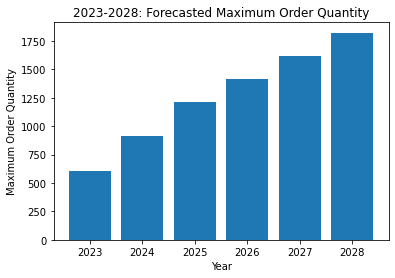

In [52]:
print("2023 Max Order: "+str(df23['Quantity'].max()))
print("2024 Max Order: "+str(df24['Quantity'].max()))
print("2025 Max Order: "+str(df25['Quantity'].max()))
print("2026 Max Order: "+str(df26['Quantity'].max()))
print("2027 Max Order: "+str(df27['Quantity'].max()))
print("2028 Max Order: "+str(df28['Quantity'].max()))
plt.bar(years,[df23['Quantity'].max(),df24['Quantity'].max(),df25['Quantity'].max(),df26['Quantity'].max(),df27['Quantity'].max(),df28['Quantity'].max()])
plt.xlabel("Year")
plt.ylabel("Maximum Order Quantity")
plt.title("2023-2028: Forecasted Maximum Order Quantity")
plt.show()

In [54]:
print("2023 # Orders: "+str(df23['Quantity'].count()))
print("2024 # Orders: "+str(df24['Quantity'].count()))
print("2025 # Orders: "+str(df25['Quantity'].count()))
print("2026 # Orders: "+str(df26['Quantity'].count()))
print("2027 # Orders: "+str(df27['Quantity'].count()))
print("2028 # Orders: "+str(df28['Quantity'].count()))

2023 # Orders: 865925
2024 # Orders: 1278144
2025 # Orders: 1663082
2026 # Orders: 3390132
2027 # Orders: 3760022
2028 # Orders: 4110534


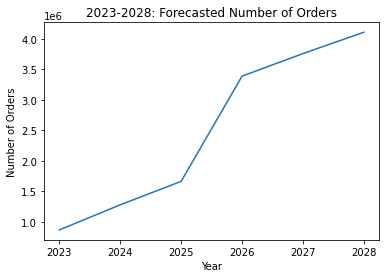

In [42]:
plt.plot(years,[df23['Quantity'].count(),df24['Quantity'].count(),df25['Quantity'].count(),df26['Quantity'].count(),df27['Quantity'].count(),df28['Quantity'].count()])
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.title("2023-2028: Forecasted Number of Orders")
plt.show()

In [66]:
min_orders23 = df23.loc[df23['Quantity']<=100]
print("2023: # Orders Less than 500: "+ str(min_orders23['Quantity'].count())+"  "+str(min_orders23['Quantity'].count()/df23['Quantity'].count()))

min_orders24 = df24.loc[df24['Quantity']<=100]
print("2024 # Orders Less than 500: "+ str(min_orders24['Quantity'].count())+"  "+str(min_orders24['Quantity'].count()/df24['Quantity'].count()))

min_orders25 = df25.loc[df25['Quantity']<=100]
print("2025: # Orders Less than 500: "+ str(min_orders25['Quantity'].count())+"  "+str(min_orders25['Quantity'].count()/df25['Quantity'].count()))

min_orders26 = df26.loc[df26['Quantity']<=100]
print("2026: # Orders Less than 500: "+ str(min_orders26['Quantity'].count())+"  "+str(min_orders26['Quantity'].count()/df26['Quantity'].count()))

min_orders27 = df27.loc[df27['Quantity']<=100]
print("2027: # Orders Less than 500: "+ str(min_orders27['Quantity'].count())+"  "+str(min_orders27['Quantity'].count()/df27['Quantity'].count()))

min_orders28 = df28.loc[df28['Quantity']<=100]
print("2028: # Orders Less than 500: "+ str(min_orders28['Quantity'].count())+"  "+str(min_orders28['Quantity'].count()/df28['Quantity'].count()))

2023: # Orders Less than 500: 849333  0.9808389872102088
2024 # Orders Less than 500: 1235955  0.9669919821240799
2025: # Orders Less than 500: 1586710  0.9540780310291375
2026: # Orders Less than 500: 3292382  0.9711663144679912
2027: # Orders Less than 500: 3634025  0.9664903556415362
2028: # Orders Less than 500: 3953583  0.961817369714008


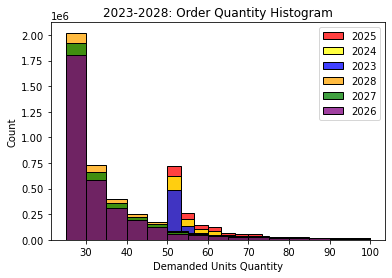

In [72]:
sns.histplot(data=min_orders25['Quantity'],bins=15,label="2025",color='red')
sns.histplot(data=min_orders24['Quantity'],bins=15,label="2024",color='yellow')
sns.histplot(data=min_orders23['Quantity'],bins=15,label="2023",color='blue')
sns.histplot(data=min_orders28['Quantity'],bins=15,label="2028",color='orange')
sns.histplot(data=min_orders27['Quantity'],bins=15,label="2027",color='green')
sns.histplot(data=min_orders26['Quantity'],bins=15,label="2026",color='purple')
plt.title('2023-2028: Order Quantity Histogram')
plt.xlabel('Demanded Units Quantity')
plt.legend()
plt.show()

In [107]:
df23_zip = df23.groupby(['Zipcode']).sum().sort_values('Quantity',ascending=False).head(10).reset_index()
df24_zip = df24.groupby(['Zipcode']).sum().sort_values('Quantity',ascending=False).head(10).reset_index()
df25_zip = df25.groupby(['Zipcode']).sum().sort_values('Quantity',ascending=False).head(10).reset_index()
df26_zip = df26.groupby(['Zipcode']).sum().sort_values('Quantity',ascending=False).head(10).reset_index()
df27_zip = df27.groupby(['Zipcode']).sum().sort_values('Quantity',ascending=False).head(10).reset_index()
df28_zip = df28.groupby(['Zipcode']).sum().sort_values('Quantity',ascending=False).head(10).reset_index()

dfall_zip = pd.concat([df23_zip,df24_zip,df25_zip,df26_zip,df27_zip,df28_zip])
dfall_zip['Count'] = 1
dfall_zip = dfall_zip.groupby(['Zipcode']).sum()
dfall_zip = dfall_zip.reset_index()

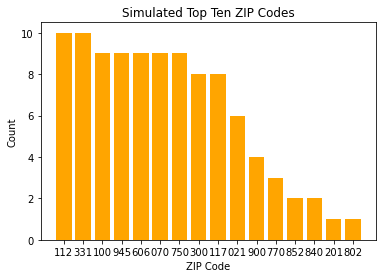

In [122]:
plt.bar(zipcode_df_2b['ZIP'],zipcode_df_2b['Count'],color='orange')
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.title('Simulated Top Ten ZIP Codes')
plt.show()

In [185]:
zipcode_2b = ['100','945','606','112','70','300','331','21','750','770','117','900','852','201','802','840',]
zipcode_count_2b = [9,9,9,10,9,8,10,6,9,3,8,4,2,1,1,2]
zipcode_df_2b = pd.DataFrame(list(zip(zipcode_2b,zipcode_count_2b)),columns=['ZIP','Count'])
zipcode_df_2b = zipcode_df_2b.sort_values(by='Count',ascending=False)
#pd.to_numeric(zipcode_df_2b['ZIP'])
zipcode_2b_int = [100,945,606,112,70,300,331,21,750,770,117,900,852,201,802,840]
zip_df_2b_int = pd.DataFrame(list(zip(zipcode_2b_int,zipcode_count_2b)),columns=['ZIP','Count'])


In [186]:
zip_df_2b_int['Latitude'] = zip_df_2b_int.loc[:,'ZIP']
zip_df_2b_int['Longitude'] = zip_df_2b_int.loc[:,'ZIP']

In [187]:
zip_df_2b_int.replace({"Latitude":zip_lat_dict,"Longitude":zip_long_dict},inplace=True)
zip_df_2b_int

,ZIP,Count,Latitude,Longitude
0,100,9,40.745256,-73.985202
1,945,9,37.845875,-122.059678
2,606,9,41.881020,-87.664762
3,112,10,40.666492,-73.953938
4,70,9,40.667400,-74.114600
5,300,8,33.878827,-84.247223
6,331,10,25.787712,-80.241397
7,21,6,42.351704,-71.077176
8,750,9,32.897812,-96.877614
9,770,3,29.770498,-95.415197


In [188]:
fig = px.scatter_geo(lon = zip_df_2b_int['Longitude'],lat = zip_df_2b_int['Latitude'], size=zip_df_2b_int['Count'])
fig.update_layout(title = 'Simulated 2023-2028: Top 10 ZIP Codes',geo_scope='usa',)
fig.show()

In [191]:
import plotly.graph_objects as go

In [200]:
fig = go.Figure(data=go.Scattergeo(
        lon = zip_df_2b_int['Longitude'],
        lat = zip_df_2b_int['Latitude'],
        marker ={'color': zip_df_2b_int['Count'],'colorbar':{'title':'Top 10 Count'},'size':zip_df_2b_int['Count']*2,}))
fig.update_layout(title = 'Demand by ZIP Code',geo_scope='usa',)
fig.show()